In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv


Importing the data

In [2]:
data = pd.read_csv('../input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv', encoding='latin-1')
data.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


Removing the Unnamed column

In [4]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


Renaming the columns

In [5]:
data.columns = ['Disease', 'Description']
data.head()

,Disease,Description
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


Plotting the data

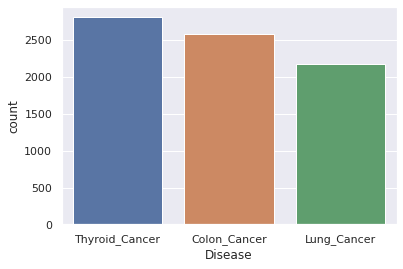

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x=(data.Disease.value_counts())
p = sns.countplot(data=data, x='Disease')
plt.show()

Installing nltk

In [7]:
!pip install nltk

Cleaning data

In [8]:
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
  
def clean_data(text):
    text = text.lower()
    pattern = '[^a-z\s]'
    text = re.sub(pattern, '', text)
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    clean_text = []
    for i in text:
        word = lemmatizer.lemmatize(i)
        if word not in stopwords.words('english'):
            clean_text.append(word)
    clean_text = ' '.join(clean_text)
    return clean_text

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data['Clean_Description'] = data.Description.apply(clean_data)

In [10]:
data.head()

,Disease,Description,Clean_Description
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",adopted strategy wa used prior year based four...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,study aimed investigate serum matrix metallopr...


Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X = data.Clean_Description
y = data.Disease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X.shape)
print(y.shape)

(7570,)
(7570,)


Tfidf Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
print(X_train_vectorized.shape)
print(X_test_transformed.shape)

(6056, 174235)
(1514, 174235)


Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_transformed)
conf = confusion_matrix(y_test, prediction)
print("Confusion Matrix : \n", conf)
print("Accuracy : ", accuracy_score(y_test, prediction)*100, "%")
print('Precision', precision_score(y_test, prediction, average='macro'))
print('Recall', recall_score(y_test, prediction, average='macro'))

Confusion Matrix : 
 [[442   0  69]
 [  0 474   0]
 [ 40   0 489]]
Accuracy :  92.8005284015852 %
Precision 0.9311188447180951
Recall 0.929785426354295
